In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,y = mnist["data"] , mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


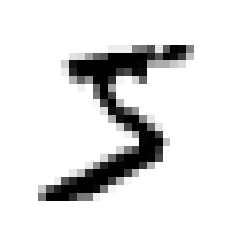

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [18]:
import numpy as np
y = y.astype(np.uint8)

X_train , X_test, y_train, y_test = X[:60000] , X[60000:] , y[:60000], y[60000:]


In [19]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

ovr_svm_clf = OneVsRestClassifier(SVC())
ovr_svm_clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [20]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ovr_svm_clf,X_train,y_train,cv=3,scoring="accuracy")
score

array([0.97685, 0.9738 , 0.97495])

In [22]:
y_pred = ovr_svm_clf.predict(X_test)

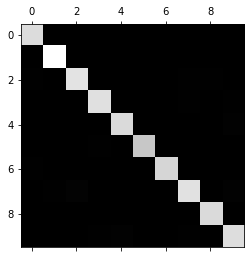

In [33]:
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt 

conf_mx = confusion_matrix(y_test,y_pred)
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

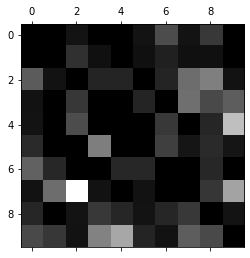

In [34]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [37]:
f1_score(y_test,y_pred,average="weighted")

0.97998856542316